In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms,datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision

import matplotlib.pyplot as plt
import time

# Load data

In [2]:
apply_transform = transforms.Compose([transforms.ToTensor()])

BatchSize1 = 256
BatchSize2 = 512
BatchSize3 = 1024

trainset1 = datasets.MNIST(root='./data', train=True, download=True, transform=apply_transform)
trainLoader1 = torch.utils.data.DataLoader(trainset1, batch_size = BatchSize1, shuffle=True, num_workers=4) # Creating dataloader 

testset1 = datasets.MNIST(root='./data', train=False, download=True, transform=apply_transform)
testLoader1 = torch.utils.data.DataLoader(testset1, batch_size = BatchSize1, shuffle=True, num_workers=4) # Creating dataloader

trainset2 = datasets.MNIST(root='./data', train=True, download=True, transform=apply_transform)
trainLoader2 = torch.utils.data.DataLoader(trainset2, batch_size = BatchSize2, shuffle=True, num_workers=4) # Creating dataloader 

testset2 = datasets.MNIST(root='./data', train=False, download=True, transform=apply_transform)
testLoader2 = torch.utils.data.DataLoader(testset2, batch_size = BatchSize2, shuffle=True, num_workers=4) # Creating dataloader

trainset3 = datasets.MNIST(root='./data', train=True, download=True, transform=apply_transform)
trainLoader3 = torch.utils.data.DataLoader(trainset3, batch_size = BatchSize3, shuffle=True, num_workers=4) # Creating dataloader 

testset3 = datasets.MNIST(root='./data', train=False, download=True, transform=apply_transform)
testLoader3 = torch.utils.data.DataLoader(testset3, batch_size = BatchSize3, shuffle=True, num_workers=4) # Creating dataloader

In [3]:
# Size of train and test datasets with batch size= 256

print('No. of samples in train set1: '+str(len(trainLoader1.dataset)))
print('No. of samples in test set1: '+str(len(testLoader1.dataset)))

# Size of train and test datasets with batch size= 512

print('No. of samples in train set2: '+str(len(trainLoader2.dataset)))
print('No. of samples in test set2: '+str(len(testLoader2.dataset)))

# Size of train and test datasets with batch size= 1024

print('No. of samples in train set3: '+str(len(trainLoader3.dataset)))
print('No. of samples in test set3: '+str(len(testLoader3.dataset)))

No. of samples in train set1: 60000
No. of samples in test set1: 10000
No. of samples in train set2: 60000
No. of samples in test set2: 10000
No. of samples in train set3: 60000
No. of samples in test set3: 10000


# Ans. No. 1: Define model architecture

In [4]:
class FFNN(nn.Module): 
    def __init__(self):
        super(FFNN, self).__init__()
        
        self.hidden = nn.Linear(784, 100) # Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
        self.output = nn.Linear(100, 10)
        self.softmax = nn.Softmax(dim=1)
        
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [5]:
net1 = FFNN()
net2 = FFNN()
net3 = FFNN()

print(net1)
print(net2)
print(net3)

FFNN(
  (hidden): Linear(in_features=784, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
FFNN(
  (hidden): Linear(in_features=784, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
FFNN(
  (hidden): Linear(in_features=784, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


# Ans. No. 3: Training and testing with batch size=256 and learning rate=0.1

In [6]:
criterion = nn.CrossEntropyLoss()
learning_rate1 = 0.1
optimizer1 = optim.SGD(net1.parameters(), lr=learning_rate1, momentum=0.9)
num_epochs = 50

train_loss1 = []
train_acc1 = []
test_loss1 = []
test_acc1 = []

for epoch in range(num_epochs):
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(trainLoader1):
        inputs, labels = data
        
        # Initializing model gradients to zero
        optimizer1.zero_grad()
        
        # Data feed-forward through the network
        outputs1 = net1(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds1 = torch.argmax(outputs1, dim=1)
        
        # Finding the loss
        loss = criterion(outputs1, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds1==labels)
        
    totalLoss1 = running_loss/(i+1)
    # Calculating gradients
    totalLoss1.backward()
    
    # Updating the model parameters
    optimizer1.step()
    
    epoch_loss1 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc1 = running_corr.item()/60000
    
    train_loss1.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
    train_acc1.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(testLoader1):
        inputs, labels = data   
        
        # Data feed-forward through the network
        outputs1 = net1(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds1 = torch.argmax(outputs1, dim=1)
        
        # Finding the loss
        loss = criterion(outputs1, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds1==labels)
        
    totalLoss1 = running_loss/(i+1)
   
     
    epoch_loss2 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc2 = running_corr.item()/10000
    
    test_loss1.append(epoch_loss2) #Saving the loss over epochs for plotting the graph
    test_acc1.append(epoch_acc2) #Saving the accuracy over epochs for plotting the graph

# Ans. No. 4: Calculations of losses and accuracies

In [7]:
for epoch in range(num_epochs):
  print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,train_loss1[epoch],train_acc1[epoch]*100))
  
  print('Epoch {:.0f}/{:.0f} : Testing loss: {:.4f} | Testing Accuracy: {:.4f}'.format(epoch+1,num_epochs,test_loss1[epoch],test_acc1[epoch]*100))

Epoch 1/50 : Training loss: 2.3029 | Training Accuracy: 9.7367
Epoch 1/50 : Testing loss: 2.3027 | Testing Accuracy: 9.8200
Epoch 2/50 : Training loss: 2.3028 | Training Accuracy: 9.7367
Epoch 2/50 : Testing loss: 2.3028 | Testing Accuracy: 9.8200
Epoch 3/50 : Training loss: 2.3028 | Training Accuracy: 9.7367
Epoch 3/50 : Testing loss: 2.3026 | Testing Accuracy: 9.8200
Epoch 4/50 : Training loss: 2.3026 | Training Accuracy: 9.7367
Epoch 4/50 : Testing loss: 2.3025 | Testing Accuracy: 9.8200
Epoch 5/50 : Training loss: 2.3025 | Training Accuracy: 9.7367
Epoch 5/50 : Testing loss: 2.3024 | Testing Accuracy: 9.8200
Epoch 6/50 : Training loss: 2.3024 | Training Accuracy: 9.7367
Epoch 6/50 : Testing loss: 2.3021 | Testing Accuracy: 9.8200
Epoch 7/50 : Training loss: 2.3022 | Training Accuracy: 9.7367
Epoch 7/50 : Testing loss: 2.3020 | Testing Accuracy: 9.8200
Epoch 8/50 : Training loss: 2.3020 | Training Accuracy: 9.7367
Epoch 8/50 : Testing loss: 2.3018 | Testing Accuracy: 9.8200
Epoch 9/

# Ans. No. 5: Graph showing the loss vs epoch taking batch size=256 and learning rate=0.1

Text(0.5, 1.0, 'Fig. 2: Testing loss vs. epoch')

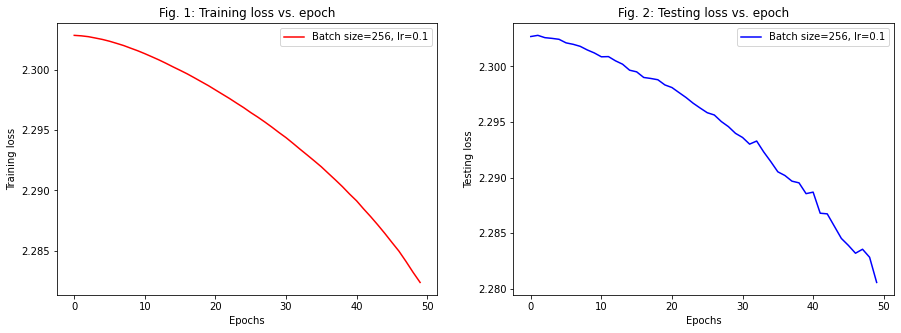

In [8]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss1,'r-',label='Batch size=256, lr=0.1') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Fig. 1: Training loss vs. epoch')
plt.subplot(122)
plt.plot(range(num_epochs),test_loss1,'b-',label='Batch size=256, lr=0.1') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Testing loss')
plt.title('Fig. 2: Testing loss vs. epoch')

# Training and testing with batch size=512 and learning rate=0.1

In [9]:
criterion = nn.CrossEntropyLoss()
learning_rate1 = 0.1
optimizer2 = optim.SGD(net2.parameters(), lr=learning_rate1, momentum=0.9)
num_epochs = 50

train_loss2 = []
train_acc2 = []
test_loss2 = []
test_acc2 = []

for epoch in range(num_epochs):
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(trainLoader2):
        inputs, labels = data
        
        # Initializing model gradients to zero
        optimizer2.zero_grad()
        
        # Data feed-forward through the network
        outputs2 = net2(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds2 = torch.argmax(outputs2, dim=1)
        
        # Finding the loss
        loss = criterion(outputs2, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds2==labels)
        
    totalLoss2 = running_loss/(i+1)
    # Calculating gradients
    totalLoss2.backward()
    
    # Updating the model parameters
    optimizer2.step()
    
    epoch_loss1 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc1 = running_corr.item()/60000
    
    train_loss2.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
    train_acc2.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(testLoader2):
        inputs, labels = data   
        
        # Data feed-forward through the network
        outputs2 = net2(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds2 = torch.argmax(outputs2, dim=1)
        
        # Finding the loss
        loss = criterion(outputs2, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds2==labels)
        
    totalLoss2 = running_loss/(i+1)
   
     
    epoch_loss2 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc2 = running_corr.item()/10000
    
    test_loss2.append(epoch_loss2) #Saving the loss over epochs for plotting the graph
    test_acc2.append(epoch_acc2) #Saving the accuracy over epochs for plotting the graph

# Training and testing with batch size=1024 and learning rate=0.1

In [10]:
criterion = nn.CrossEntropyLoss()
learning_rate1 = 0.1
optimizer3 = optim.SGD(net3.parameters(), lr=learning_rate1, momentum=0.9)
num_epochs = 50

train_loss3 = []
train_acc3 = []
test_loss3 = []
test_acc3 = []

for epoch in range(num_epochs):
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(trainLoader3):
        inputs, labels = data
        
        # Initializing model gradients to zero
        optimizer3.zero_grad()
        
        # Data feed-forward through the network
        outputs3 = net3(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds3 = torch.argmax(outputs3, dim=1)
        
        # Finding the loss
        loss = criterion(outputs3, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds3==labels)
        
    totalLoss3 = running_loss/(i+1)
    # Calculating gradients
    totalLoss3.backward()
    
    # Updating the model parameters
    optimizer3.step()
    
    epoch_loss1 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc1 = running_corr.item()/60000
    
    train_loss3.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
    train_acc3.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(testLoader3):
        inputs, labels = data   
        
        # Data feed-forward through the network
        outputs3 = net3(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds3 = torch.argmax(outputs3, dim=1)
        
        # Finding the loss
        loss = criterion(outputs3, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds3==labels)
        
    totalLoss3 = running_loss/(i+1)
   
     
    epoch_loss2 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc2 = running_corr.item()/10000
    
    test_loss3.append(epoch_loss2) #Saving the loss over epochs for plotting the graph
    test_acc3.append(epoch_acc2) #Saving the accuracy over epochs for plotting the graph

# Ans. No. 6.(a): Variation of train and test errors with increase in batch size.

Text(0.5, 1.0, 'Fig. 4: Testing loss vs. epoch')

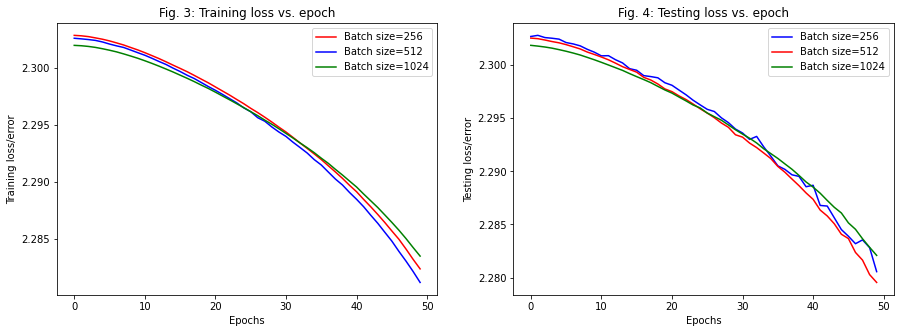

In [11]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss1,'r-',label='Batch size=256')
plt.plot(range(num_epochs),train_loss2,'r-', color = 'blue', label='Batch size=512')
plt.plot(range(num_epochs),train_loss3,'r-', color = 'green', label='Batch size=1024')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss/error')
plt.title('Fig. 3: Training loss vs. epoch')

plt.subplot(122)
plt.plot(range(num_epochs),test_loss1,'b-',label='Batch size=256')
plt.plot(range(num_epochs),test_loss2,'b-', color = 'red', label='Batch size=512')
plt.plot(range(num_epochs),test_loss3,'b-', color = 'green', label='Batch size=1024') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Testing loss/error')
plt.title('Fig. 4: Testing loss vs. epoch')

# Variation of train and test accuracies with increase in batch size.

Text(0.5, 1.0, 'Fig. 6: Testing accuracy vs. epoch')

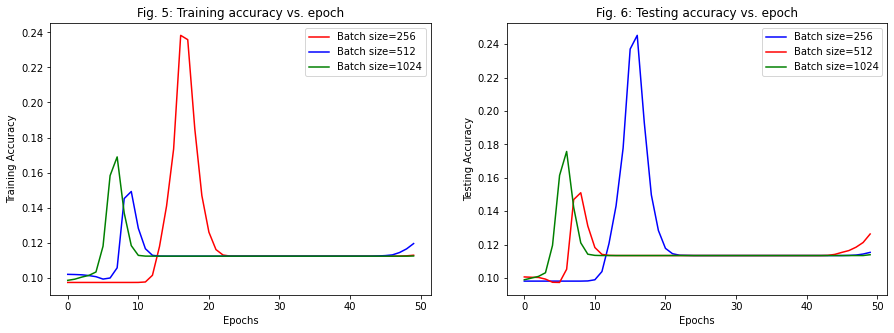

In [12]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_acc1,'r-',label='Batch size=256')
plt.plot(range(num_epochs),train_acc2,'r-', color = 'blue', label='Batch size=512')
plt.plot(range(num_epochs),train_acc3,'r-', color = 'green', label='Batch size=1024')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Fig. 5: Training accuracy vs. epoch')

plt.subplot(122)
plt.plot(range(num_epochs),test_acc1,'b-',label='Batch size=256')
plt.plot(range(num_epochs),test_acc2,'b-', color = 'red', label='Batch size=512')
plt.plot(range(num_epochs),test_acc3,'b-', color = 'green', label='Batch size=1024') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')
plt.title('Fig. 6: Testing accuracy vs. epoch')

In [13]:
net4 = FFNN()
net5 = FFNN()
net6 = FFNN()
net7 = FFNN()

# Training and testing with batch size=256 and learning rate=0.025

In [14]:
criterion = nn.CrossEntropyLoss()
learning_rate2 = 0.025
optimizer4 = optim.SGD(net4.parameters(), lr=learning_rate2, momentum=0.9)
num_epochs = 50

train_loss4 = []
train_acc4 = []
test_loss4 = []
test_acc4 = []

for epoch in range(num_epochs):
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(trainLoader1):
        inputs, labels = data
        
        # Initializing model gradients to zero
        optimizer4.zero_grad()
        
        # Data feed-forward through the network
        outputs4 = net4(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds4 = torch.argmax(outputs4, dim=1)
        
        # Finding the loss
        loss = criterion(outputs4, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds4==labels)
        
    totalLoss4 = running_loss/(i+1)
    # Calculating gradients
    totalLoss4.backward()
    
    # Updating the model parameters
    optimizer4.step()
    
    epoch_loss1 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc1 = running_corr.item()/60000
    
    train_loss4.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
    train_acc4.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(testLoader1):
        inputs, labels = data   
        
        # Data feed-forward through the network
        outputs4 = net4(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds4 = torch.argmax(outputs4, dim=1)
        
        # Finding the loss
        loss = criterion(outputs4, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds4==labels)
        
    totalLoss4 = running_loss/(i+1)
   
     
    epoch_loss2 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc2 = running_corr.item()/10000
    
    test_loss4.append(epoch_loss2) #Saving the loss over epochs for plotting the graph
    test_acc4.append(epoch_acc2) #Saving the accuracy over epochs for plotting the graph

# Training and testing with batch size=256 and learning rate=0.05

In [15]:
criterion = nn.CrossEntropyLoss()
learning_rate3 = 0.05
optimizer5 = optim.SGD(net5.parameters(), lr=learning_rate3, momentum=0.9)
num_epochs = 50

train_loss5 = []
train_acc5 = []
test_loss5 = []
test_acc5 = []

for epoch in range(num_epochs):
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(trainLoader1):
        inputs, labels = data
        
        # Initializing model gradients to zero
        optimizer5.zero_grad()
        
        # Data feed-forward through the network
        outputs5 = net5(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds5 = torch.argmax(outputs5, dim=1)
        
        # Finding the loss
        loss = criterion(outputs5, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds5==labels)
        
    totalLoss5 = running_loss/(i+1)
    # Calculating gradients
    totalLoss5.backward()
    
    # Updating the model parameters
    optimizer5.step()
    
    epoch_loss1 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc1 = running_corr.item()/60000
    
    train_loss5.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
    train_acc5.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(testLoader1):
        inputs, labels = data   
        
        # Data feed-forward through the network
        outputs5 = net5(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds5 = torch.argmax(outputs5, dim=1)
        
        # Finding the loss
        loss = criterion(outputs5, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds5==labels)
        
    totalLoss5 = running_loss/(i+1)
   
     
    epoch_loss2 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc2 = running_corr.item()/10000
    
    test_loss5.append(epoch_loss2) #Saving the loss over epochs for plotting the graph
    test_acc5.append(epoch_acc2) #Saving the accuracy over epochs for plotting the graph

# Training and testing with batch size=256 and learning rate=0.2

In [16]:
criterion = nn.CrossEntropyLoss()
learning_rate4 = 0.2
optimizer6 = optim.SGD(net6.parameters(), lr=learning_rate4, momentum=0.9)
num_epochs = 50

train_loss6 = []
train_acc6 = []
test_loss6 = []
test_acc6 = []

for epoch in range(num_epochs):
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(trainLoader1):
        inputs, labels = data
        
        # Initializing model gradients to zero
        optimizer6.zero_grad()
        
        # Data feed-forward through the network
        outputs6 = net6(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds6 = torch.argmax(outputs6, dim=1)
        
        # Finding the loss
        loss = criterion(outputs6, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds6==labels)
        
    totalLoss6 = running_loss/(i+1)
    # Calculating gradients
    totalLoss6.backward()
    
    # Updating the model parameters
    optimizer6.step()
    
    epoch_loss1 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc1 = running_corr.item()/60000
    
    train_loss6.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
    train_acc6.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(testLoader1):
        inputs, labels = data   
        
        # Data feed-forward through the network
        outputs6 = net6(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds6 = torch.argmax(outputs6, dim=1)
        
        # Finding the loss
        loss = criterion(outputs6, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds6==labels)
        
    totalLoss6 = running_loss/(i+1)
   
     
    epoch_loss2 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc2 = running_corr.item()/10000
    
    test_loss6.append(epoch_loss2) #Saving the loss over epochs for plotting the graph
    test_acc6.append(epoch_acc2) #Saving the accuracy over epochs for plotting the graph

# Training and testing with batch size=256 and learning rate=0.5

In [17]:
criterion = nn.CrossEntropyLoss()
learning_rate5 = 0.5
optimizer7 = optim.SGD(net7.parameters(), lr=learning_rate5, momentum=0.9)
num_epochs = 50

train_loss7 = []
train_acc7 = []
test_loss7 = []
test_acc7 = []

for epoch in range(num_epochs):
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(trainLoader1):
        inputs, labels = data
        
        # Initializing model gradients to zero
        optimizer7.zero_grad()
        
        # Data feed-forward through the network
        outputs7 = net7(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds7 = torch.argmax(outputs7, dim=1)
        
        # Finding the loss
        loss = criterion(outputs7, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds7==labels)
        
    totalLoss7 = running_loss/(i+1)
    # Calculating gradients
    totalLoss7.backward()
    
    # Updating the model parameters
    optimizer7.step()
    
    epoch_loss1 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc1 = running_corr.item()/60000
    
    train_loss7.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
    train_acc7.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(testLoader1):
        inputs, labels = data   
        
        # Data feed-forward through the network
        outputs7 = net7(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds7 = torch.argmax(outputs7, dim=1)
        
        # Finding the loss
        loss = criterion(outputs7, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds7==labels)
        
    totalLoss7 = running_loss/(i+1)
   
     
    epoch_loss2 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc2 = running_corr.item()/10000
    
    test_loss7.append(epoch_loss2) #Saving the loss over epochs for plotting the graph
    test_acc7.append(epoch_acc2) #Saving the accuracy over epochs for plotting the graph

Text(0.5, 1.0, 'Fig. 8: Test accuracy vs. epoch')

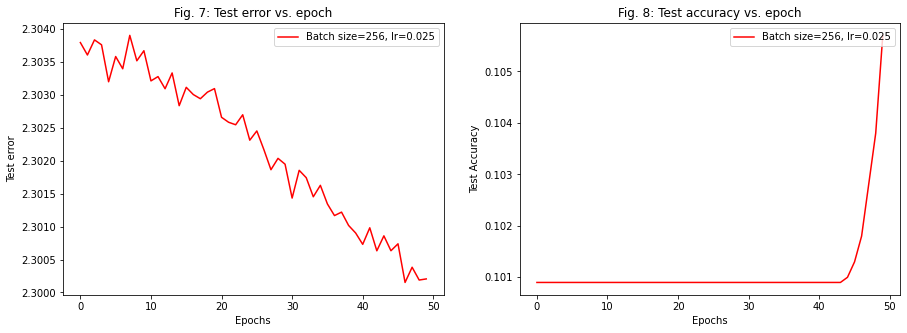

In [18]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),test_loss4,'r-',label='Batch size=256, lr=0.025')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test error')
plt.title('Fig. 7: Test error vs. epoch')
 
plt.subplot(122)
plt.plot(range(num_epochs),test_acc4,'r-',label='Batch size=256, lr=0.025')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fig. 8: Test accuracy vs. epoch')

Text(0.5, 1.0, 'Fig. 10: Test accuracy vs. epoch')

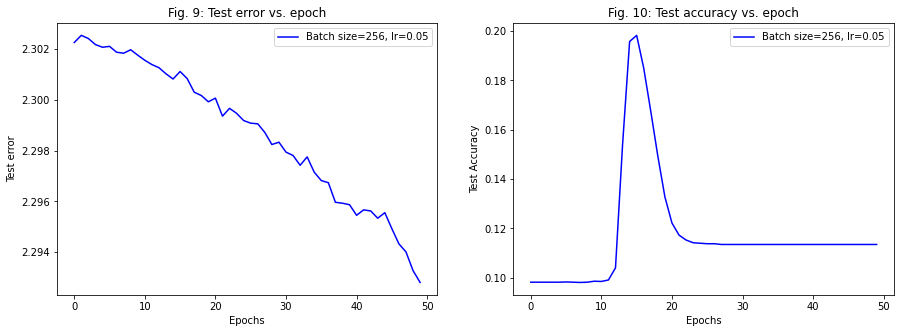

In [19]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)

plt.plot(range(num_epochs),test_loss5,'r-', color = 'blue', label='Batch size=256, lr=0.05')
  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test error')
plt.title('Fig. 9: Test error vs. epoch')
 
plt.subplot(122)

plt.plot(range(num_epochs),test_acc5,'r-', color = 'blue', label='Batch size=256, lr=0.05')
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fig. 10: Test accuracy vs. epoch')

Text(0.5, 1.0, 'Fig. 12: Test accuracy vs. epoch')

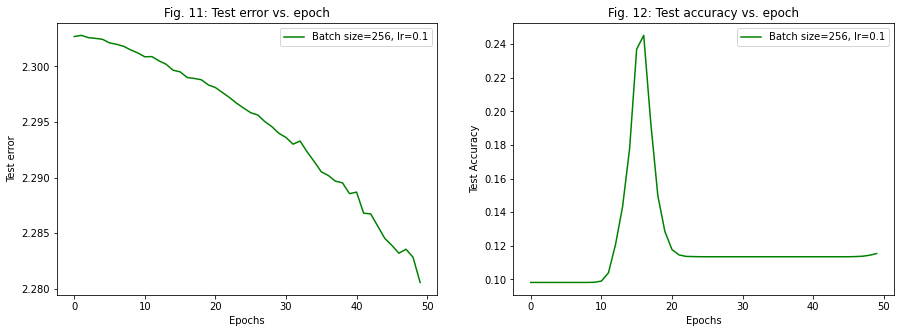

In [20]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)

plt.plot(range(num_epochs),test_loss1,'r-', color = 'green', label='Batch size=256, lr=0.1')
  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test error')
plt.title('Fig. 11: Test error vs. epoch')
 
plt.subplot(122)

plt.plot(range(num_epochs),test_acc1,'r-', color = 'green', label='Batch size=256, lr=0.1')
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fig. 12: Test accuracy vs. epoch')

Text(0.5, 1.0, 'Fig. 14: Test accuracy vs. epoch')

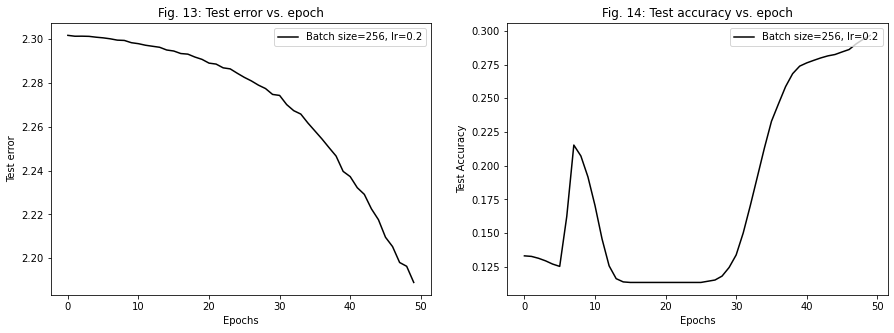

In [21]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)

plt.plot(range(num_epochs),test_loss6,'r-', color = 'black', label='Batch size=256, lr=0.2') 

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test error')
plt.title('Fig. 13: Test error vs. epoch')
 
plt.subplot(122)

plt.plot(range(num_epochs),test_acc6,'r-', color = 'black', label='Batch size=256, lr=0.2') 
  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fig. 14: Test accuracy vs. epoch')

Text(0.5, 1.0, 'Fig. 16: Test accuracy vs. epoch')

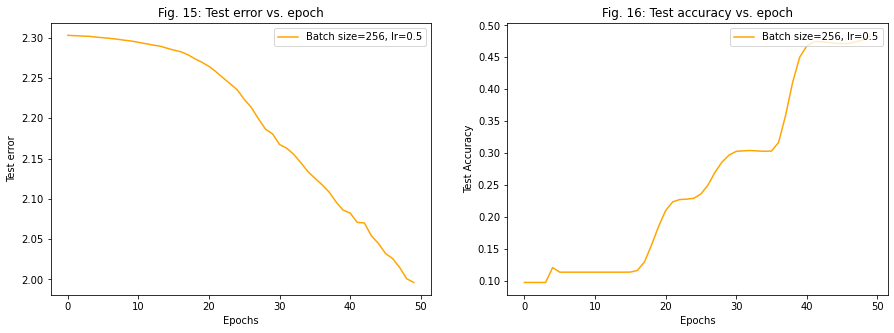

In [22]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
 
plt.plot(range(num_epochs),test_loss7,'r-', color = 'orange', label='Batch size=256, lr=0.5')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test error')
plt.title('Fig. 15: Test error vs. epoch')
 
plt.subplot(122)
 
plt.plot(range(num_epochs),test_acc7,'r-', color = 'orange', label='Batch size=256, lr=0.5')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fig. 16: Test accuracy vs. epoch')

# Ans. No. 6.(b):

Text(0.5, 1.0, 'Fig. 18: Test accuracy vs. epoch')

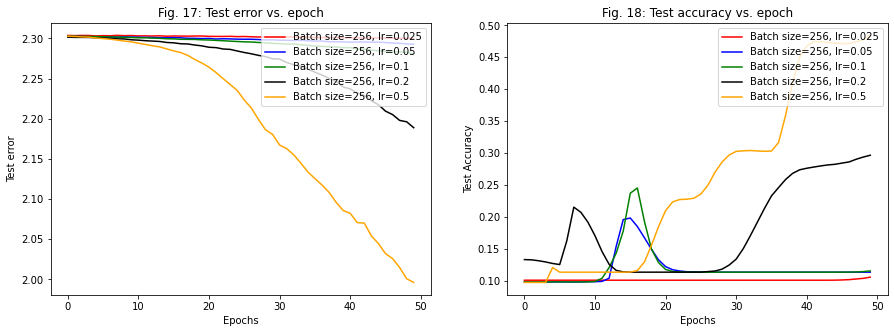

In [23]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),test_loss4,'r-',label='Batch size=256, lr=0.025')
plt.plot(range(num_epochs),test_loss5,'r-', color = 'blue', label='Batch size=256, lr=0.05')
plt.plot(range(num_epochs),test_loss1,'r-', color = 'green', label='Batch size=256, lr=0.1')
plt.plot(range(num_epochs),test_loss6,'r-', color = 'black', label='Batch size=256, lr=0.2') 
plt.plot(range(num_epochs),test_loss7,'r-', color = 'orange', label='Batch size=256, lr=0.5')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test error')
plt.title('Fig. 17: Test error vs. epoch')

 
plt.subplot(122)
plt.plot(range(num_epochs),test_acc4,'r-',label='Batch size=256, lr=0.025')
plt.plot(range(num_epochs),test_acc5,'r-', color = 'blue', label='Batch size=256, lr=0.05')
plt.plot(range(num_epochs),test_acc1,'r-', color = 'green', label='Batch size=256, lr=0.1')
plt.plot(range(num_epochs),test_acc6,'r-', color = 'black', label='Batch size=256, lr=0.2') 
plt.plot(range(num_epochs),test_acc7,'r-', color = 'orange', label='Batch size=256, lr=0.5')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fig. 18: Test accuracy vs. epoch')

# Ans. No. 6.(c):

In [24]:
net8 = FFNN()

In [25]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.5
optimizer8 = optim.SGD(net8.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 50

train_loss8 = []
train_acc8 = []
test_loss8 = []
test_acc8 = []

for epoch in range(num_epochs):
    if num_epochs>=10 and num_epochs<20:
      learning_rate = 0.2
      optimizer8 = optim.SGD(net8.parameters(), lr=learning_rate, momentum=0.9)
    elif num_epochs>=20 and num_epochs<30:
      learning_rate = 0.1
      optimizer8 = optim.SGD(net8.parameters(), lr=learning_rate, momentum=0.9)
    elif num_epochs>=30 and num_epochs<40:
      learning_rate = 0.05
      optimizer8 = optim.SGD(net8.parameters(), lr=learning_rate, momentum=0.9)
    else:
      learning_rate = 0.025
      optimizer8 = optim.SGD(net8.parameters(), lr=learning_rate, momentum=0.9)

    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(trainLoader1):
        inputs, labels = data
        
        # Initializing model gradients to zero
        optimizer8.zero_grad()
        
        # Data feed-forward through the network
        outputs8 = net8(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds8 = torch.argmax(outputs8, dim=1)
        
        # Finding the loss
        loss = criterion(outputs8, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds8==labels)
        
    totalLoss8 = running_loss/(i+1)
    # Calculating gradients
    totalLoss8.backward()
    
    # Updating the model parameters
    optimizer8.step()
    
    epoch_loss1 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc1 = running_corr.item()/60000
    
    train_loss8.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
    train_acc8.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
    
    running_loss = 0.0
    running_corr = 0
    
    for i,data in enumerate(testLoader1):
        inputs, labels = data   
        
        # Data feed-forward through the network
        outputs8 = net8(inputs.view(inputs.shape[0],-1))
        
        # Predicted class is the one with maximum probability
        preds8 = torch.argmax(outputs8, dim=1)
        
        # Finding the loss
        loss = criterion(outputs8, labels)
        
        # Accumulating the loss for each batch
        running_loss += loss
        
        # Accumulating the number of correct predictions
        running_corr += torch.sum(preds8==labels)
        
    totalLoss8 = running_loss/(i+1)
   
     
    epoch_loss2 = running_loss.item()/(i+1) # Total loss for one epoch
    epoch_acc2 = running_corr.item()/10000
    
    test_loss8.append(epoch_loss2) #Saving the loss over epochs for plotting the graph
    test_acc8.append(epoch_acc2) #Saving the accuracy over epochs for plotting the graph

Text(0.5, 1.0, 'Fig. 20: Test accuracy vs. epoch')

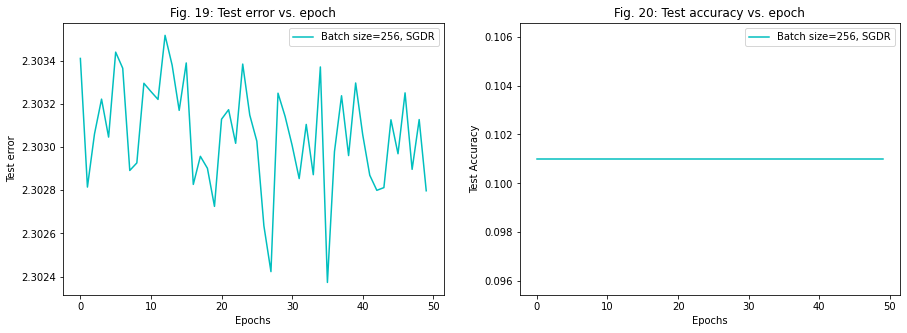

In [26]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),test_loss8,'c-',label='Batch size=256, SGDR')

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test error')
plt.title('Fig. 19: Test error vs. epoch')

 
plt.subplot(122)
plt.plot(range(num_epochs),test_acc8,'c-',label='Batch size=256, SGDR')

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fig. 20: Test accuracy vs. epoch')

**Ans. No. 6.(b):** The variations of test errors and also the test accuracies with respect to the given 5 learning rates are shown from Fig. 7 to Fig. 16. Also these variations are depicted all together in Fig no. 17 and Fig. no. 18 respectively.
  

1.   **Case-1 (learning rate=0.025):** When learning rate is 0.025, we can observe that the testing error/loss is decreased in a very small amount (i.e. 2.3040 to 2.3000) from Fig. no. 7. In Fig. no. 8, we can see that the testing accuracy is increased but not significantly (approx. 10.57% after 50 epochs)  
2.   **Case-2 (learning rate=0.05):** When learning rate is 0.05, we can observe from Fig. no.9, that the testing error/loss is significantly decreased compared to the previous case. In Fig. no. 10, we can see that the testing accuracy is increased and it is reached approx. 20% at epoch 12. Then it is decreased with epoch numbers and finally end up with 11.35%.

1.   **Case-3 (learning rate=0.1):** When learning rate is 0.1, the behaviours of the graph in Fig. no. 11 and 12 are quite similar with the previous case (learning rate=0.05) and finally the test accuracy is 11.54%. 

1.   **Case-4 (learning rate=0.2):** In Fig. no. 13, when learning rate is 0.2 the testing error is decreasing with the epoch number. In Fig. no. 14, we can see that the testing accuracy is increased after epoch number 30 and after 50 epochs it is 29.66%.
2.   **Case-5 (learning rate=0.5):** In Fig. no. 15, when learning rate is 0.5, the testing error is significantly decreased (from 2.30 to 2.00). Also, we can observe the testing accuracy is increased gradually and end up with 48.43% which is highest among all.

After all these observations, I will prefer to choose the learning rate as 0.5 for this problem. The reasons are following.


*   The testing error is less than all the other cases after 50 epochs.
*   The testing accuracy is the highest among all the cases. 







**Ans. No. 6 (c):** 

*   In the case of Stochastic Gradient Descent with Restarts (SGDR), the testing error is not monotonically increased or decreased with the number of epochs and the change is not significant according to Fig. no. 19.
*   In Fig. no. 20, it is observed that the testing accuracy is constant throughout 50 epochs and that is 10.1% which is quite low.

So, SGDR will not be suitable for the given model in digit classification task.



In [27]:
correct_pred = 0
for data in testLoader1:
    inputs,labels = data
    # Feedforward train data batch through model
    output = net4(inputs.view(inputs.shape[0],-1)) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels)

test_accuracy1 = correct_pred.item()/10000.0
print('Testing accuracy for batch size=256 and learning rate=0.025: ',test_accuracy1*100)

Testing accuracy for batch size=256 and learning rate=0.025:  10.57


In [28]:
correct_pred = 0
for data in testLoader1:
    inputs,labels = data
    # Feedforward train data batch through model
    output = net5(inputs.view(inputs.shape[0],-1)) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels)

test_accuracy2 = correct_pred.item()/10000.0
print('Testing accuracy for batch size=256 and learning rate=0.05: ',test_accuracy2*100)

Testing accuracy for batch size=256 and learning rate=0.05:  11.35


In [31]:
correct_pred = 0
for data in testLoader1:
    inputs,labels = data
    # Feedforward train data batch through model
    output = net1(inputs.view(inputs.shape[0],-1)) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels)

test_accuracy3 = correct_pred.item()/10000.0
print('Testing accuracy for batch size=256 and learning rate=0.1: ',test_accuracy3*100)

Testing accuracy for batch size=256 and learning rate=0.1:  11.540000000000001


In [32]:
correct_pred = 0
for data in testLoader1:
    inputs,labels = data
    # Feedforward train data batch through model
    output = net6(inputs.view(inputs.shape[0],-1)) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels)

test_accuracy4 = correct_pred.item()/10000.0
print('Testing accuracy for batch size=256 and learning rate=0.2: ',test_accuracy4*100)

Testing accuracy for batch size=256 and learning rate=0.2:  29.659999999999997


In [33]:
correct_pred = 0
for data in testLoader1:
    inputs,labels = data
    # Feedforward train data batch through model
    output = net7(inputs.view(inputs.shape[0],-1)) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels)

test_accuracy5 = correct_pred.item()/10000.0
print('Testing accuracy for batch size=256 and learning rate=0.5: ',test_accuracy5*100)

Testing accuracy for batch size=256 and learning rate=0.5:  48.43


In [34]:
correct_pred = 0
for data in testLoader1:
    inputs,labels = data
    # Feedforward train data batch through model
    output = net8(inputs.view(inputs.shape[0],-1)) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels)

test_accuracy6 = correct_pred.item()/10000.0
print('Testing accuracy for batch size=256 with SGDR: ',test_accuracy6*100)

Testing accuracy for batch size=256 with SGDR:  10.100000000000001


Text(0.5, 1.0, 'Fig. 19: Test accuracy vs. Learning rate')

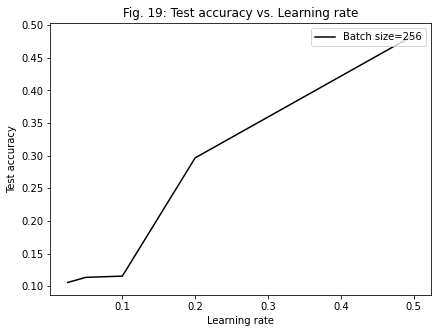

In [35]:
test_accuracy=[test_accuracy1, test_accuracy2, test_accuracy3, test_accuracy4, test_accuracy5]
lr=[0.025, 0.05, 0.1, 0.2, 0.5]

fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(lr,test_accuracy,'k-',label='Batch size=256')

plt.legend(loc='upper right')
plt.xlabel('Learning rate')
plt.ylabel('Test accuracy')
plt.title('Fig. 19: Test accuracy vs. Learning rate')
